In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'FDistance'

In [3]:
tragitti = pd.read_csv(csvfile, index_col=False)

In [4]:
# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

distance_cond = tragitti[distance_param] != 0
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] <= tragitti['Car2Go']) & (tragitti['Car'] <= tragitti['Enjoy'])

all_cond = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

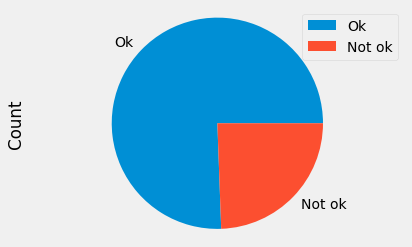

In [5]:
ok = [b for b in all_cond if b]
index=['Ok', 'Not ok']
col=[len(ok), len(tragitti) - len(ok)]

df = pd.DataFrame(col, index, columns=['Count'])
df.plot.pie('Count')
plt.axis('equal')
plt.show()